In [1]:
import cv2
import numpy as np
import sys
import torch
from src.fusionModel.nn.segment import SegmentFocus
torch.set_float32_matmul_precision('medium')

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[[[-0.4708, -0.4195, -0.1754,  ..., -0.3671, -0.3130, -0.5167],
          [-0.2375, -0.3646, -0.4027,  ..., -0.4468, -0.3818, -0.4585],
          [-0.3987, -0.1868, -0.1121,  ..., -0.4513, -0.3893, -0.2916],
          ...,
          [-0.5711, -0.1543,  0.0645,  ..., -0.0895, -0.3784, -0.2537],
          [-0.2111, -0.2600, -0.2108,  ..., -0.3591, -0.5120, -0.4232],
          [-0.4658, -0.4220, -0.1093,  ..., -0.3496, -0.4443, -0.4463]],

         [[-0.0339, -0.0062,  0.0164,  ..., -0.0121,  0.0433, -0.0891],
          [ 0.1422,  0.0460,  0.1328,  ..., -0.0020, -0.1487,  0.0546],
          [-0.0021, -0.1440, -0.1052,  ..., -0.0340, -0.0564,  0.0654],
          ...,
          [ 0.0746, -0.2797, -0.2329,  ..., -0.0743, -0.1413, -0.1047],
          [-0.1368, -0.2269, -0.1969,  ..., -0.1341, -0.1293, -0.0053],
          [ 0.1171,  0.0714,  0.0960,  ...,  0.1298,  0.0083,  0.0006]],

         [[ 0.0055,  0.1519,  0.1931,  ...,  0.1918,  0.2692, -0.0811],
          [ 0.1384,  0.3653,  

In [53]:
import cv2
import torch
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


# Open the image using PIL
image1 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageA/687_A.png')
image2 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageB/687_B.png')
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformations to the image
image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegmentFocus([16, 16, 32, 32], 16)
model = model.to(device)
dummy_output = model(image1.to(device), image2.to(device))
model = torch.compile(model)
model.load_state_dict(torch.load('/home/anirudhan/project/image-fusion/results/checkpoints/model_53.pth')['model_state_dict'])

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [54]:
model = model.eval()
output = model(image1.to(device), image2.to(device))
output = torch.nn.functional.softmax(output, dim=1)

In [55]:
output = output.squeeze().detach().cpu().permute(1, 2, 0).numpy()

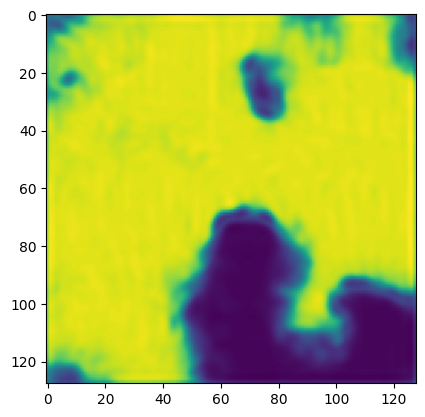

In [57]:
plt.imshow(output[:,:,2])